In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

# the image is being read in BGR format by default. OpenCV (cv2) always loads images with the channels ordered as Blue, Green, Red, not RGB.

In [51]:
rgb_image = cv2.imread("./data/beach-blue.jpg")

In [52]:
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

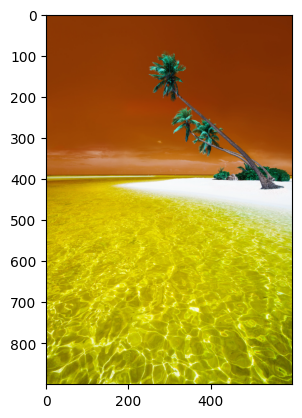

In [53]:
plt.imshow(rgb_image)

In [54]:
def apply_filter(image, filter, arrange="RGB"):
    b, g, r = cv2.split(image)
    #Since the input image is assumed to be in BGR order (OpenCV’s default), b corresponds to the blue channel, g to green, and r to red. This step prepares the channels for individual filtering.
    b_new = cv2.filter2D(b, -1, filter)
    g_new = cv2.filter2D(g, -1, filter)
    r_new = cv2.filter2D(r, -1, filter)
    if arrange=="RGB":
        image_filtered = cv2.merge([r_new, g_new, b_new])
    if arrange=="BGR":
        image_filtered = cv2.merge([b_new, g_new, r_new])
    if arrange=="GBR":
        image_filtered = cv2.merge([g_new, b_new, r_new])
    return image_filtered

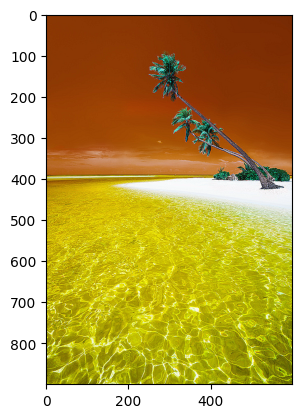

In [56]:
plt.imshow(apply_filter(rgb_image, kernel, arrange="BGR"))

Text(0.5, 1.0, 'Filtered Image')

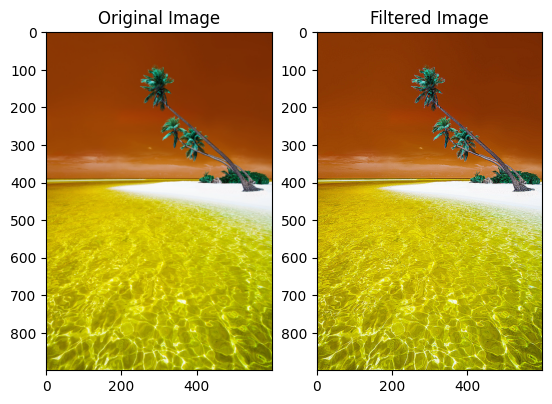

In [59]:
plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(apply_filter(rgb_image, kernel, arrange="BGR"))
plt.title("Filtered Image")

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_filter(image, filter_kernel, arrange="RGB"):
    """
    Apply a filter to each channel, print and visualize original/filtered channels in both grayscale
    and their respective colors, and show the original and filtered images in color.
    Optimized for Jupyter Notebook.
    
    Args:
        image: Input image (assumed to be in BGR format, as read by cv2.imread).
        filter_kernel: Kernel for cv2.filter2D (numpy array).
        arrange: Output channel order ("RGB", "BGR", or "GBR").
    
    Returns:
        Filtered image in the specified channel order.
    """
    # Validate inputs
    if not isinstance(image, np.ndarray) or len(image.shape) != 3 or image.shape[2] != 3:
        raise ValueError("Input image must be a 3-channel color image.")
    if not isinstance(filter_kernel, np.ndarray):
        raise ValueError("Filter kernel must be a numpy array.")
    if arrange not in ["RGB", "BGR", "GBR"]:
        raise ValueError("Arrange must be 'RGB', 'BGR', or 'GBR'.")

    # Split the image into B, G, R channels (assuming BGR input)
    b, g, r = cv2.split(image)

    # Apply the filter to each channel
    b_new = cv2.filter2D(b, -1, filter_kernel)
    g_new = cv2.filter2D(g, -1, filter_kernel)
    r_new = cv2.filter2D(r, -1, filter_kernel)

    # Create color representations of original channels
    b_color = cv2.merge([b, np.zeros_like(b), np.zeros_like(b)])  # Blue in blue
    g_color = cv2.merge([np.zeros_like(g), g, np.zeros_like(g)])  # Green in green
    r_color = cv2.merge([np.zeros_like(r), np.zeros_like(r), r])  # Red in red

    # Create color representations of filtered channels
    b_new_color = cv2.merge([b_new, np.zeros_like(b_new), np.zeros_like(b_new)])  # Blue in blue
    g_new_color = cv2.merge([np.zeros_like(g_new), g_new, np.zeros_like(g_new)])  # Green in green
    r_new_color = cv2.merge([np.zeros_like(r_new), np.zeros_like(r_new), r_new])  # Red in red

    # Visualize grayscale original and filtered channels in a 2x3 grid
    fig_gray, axes_gray = plt.subplots(2, 3, figsize=(15, 10))
    
    axes_gray[0, 0].imshow(b, cmap='gray')
    axes_gray[0, 0].set_title("Original Blue Channel (Grayscale)")
    axes_gray[0, 0].axis('off')
    
    axes_gray[0, 1].imshow(g, cmap='gray')
    axes_gray[0, 1].set_title("Original Green Channel (Grayscale)")
    axes_gray[0, 1].axis('off')
    
    axes_gray[0, 2].imshow(r, cmap='gray')
    axes_gray[0, 2].set_title("Original Red Channel (Grayscale)")
    axes_gray[0, 2].axis('off')
    
    axes_gray[1, 0].imshow(b_new, cmap='gray')
    axes_gray[1, 0].set_title("Filtered Blue Channel (Grayscale)")
    axes_gray[1, 0].axis('off')
    
    axes_gray[1, 1].imshow(g_new, cmap='gray')
    axes_gray[1, 1].set_title("Filtered Green Channel (Grayscale)")
    axes_gray[1, 1].axis('off')
    
    axes_gray[1, 2].imshow(r_new, cmap='gray')
    axes_gray[1, 2].set_title("Filtered Red Channel (Grayscale)")
    axes_gray[1, 2].axis('off')
    
    plt.tight_layout()
    plt.show()

    # Visualize colored original and filtered channels in a 2x3 grid
    fig_color, axes_color = plt.subplots(2, 3, figsize=(15, 10))
    
    axes_color[0, 0].imshow(cv2.cvtColor(b_color, cv2.COLOR_BGR2RGB))
    axes_color[0, 0].set_title("Original Blue Channel (Blue)")
    axes_color[0, 0].axis('off')
    
    axes_color[0, 1].imshow(cv2.cvtColor(g_color, cv2.COLOR_BGR2RGB))
    axes_color[0, 1].set_title("Original Green Channel (Green)")
    axes_color[0, 1].axis('off')
    
    axes_color[0, 2].imshow(cv2.cvtColor(r_color, cv2.COLOR_BGR2RGB))
    axes_color[0, 2].set_title("Original Red Channel (Red)")
    axes_color[0, 2].axis('off')
    
    axes_color[1, 0].imshow(cv2.cvtColor(b_new_color, cv2.COLOR_BGR2RGB))
    axes_color[1, 0].set_title("Filtered Blue Channel (Blue)")
    axes_color[1, 0].axis('off')
    
    axes_color[1, 1].imshow(cv2.cvtColor(g_new_color, cv2.COLOR_BGR2RGB))
    axes_color[1, 1].set_title("Filtered Green Channel (Green)")
    axes_color[1, 1].axis('off')
    
    axes_color[1, 2].imshow(cv2.cvtColor(r_new_color, cv2.COLOR_BGR2RGB))
    axes_color[1, 2].set_title("Filtered Red Channel (Red)")
    axes_color[1, 2].axis('off')
    
    plt.tight_layout()
    plt.show()

    # Show original image in color
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    # Merge and show filtered image in color
    if arrange == "RGB":
        image_filtered = cv2.merge([r_new, g_new, b_new])
    elif arrange == "BGR":
        image_filtered = cv2.merge([b_new, g_new, r_new])
    elif arrange == "GBR":
        image_filtered = cv2.merge([g_new, b_new, r_new])

    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(image_filtered, cv2.COLOR_BGR2RGB))
    plt.title("Filtered Image")
    plt.axis('off')
    plt.show()

    return image_filtered

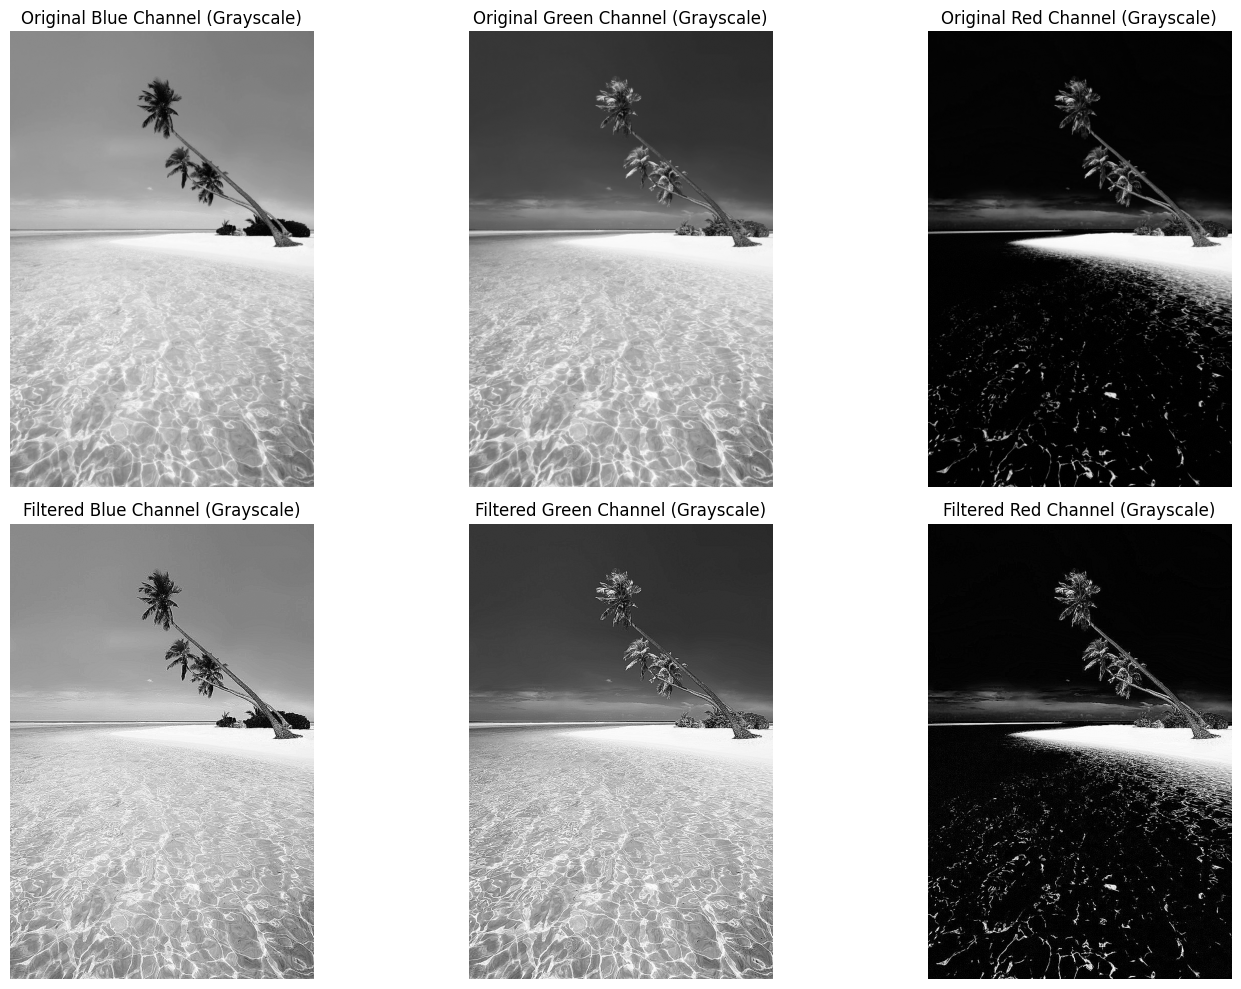

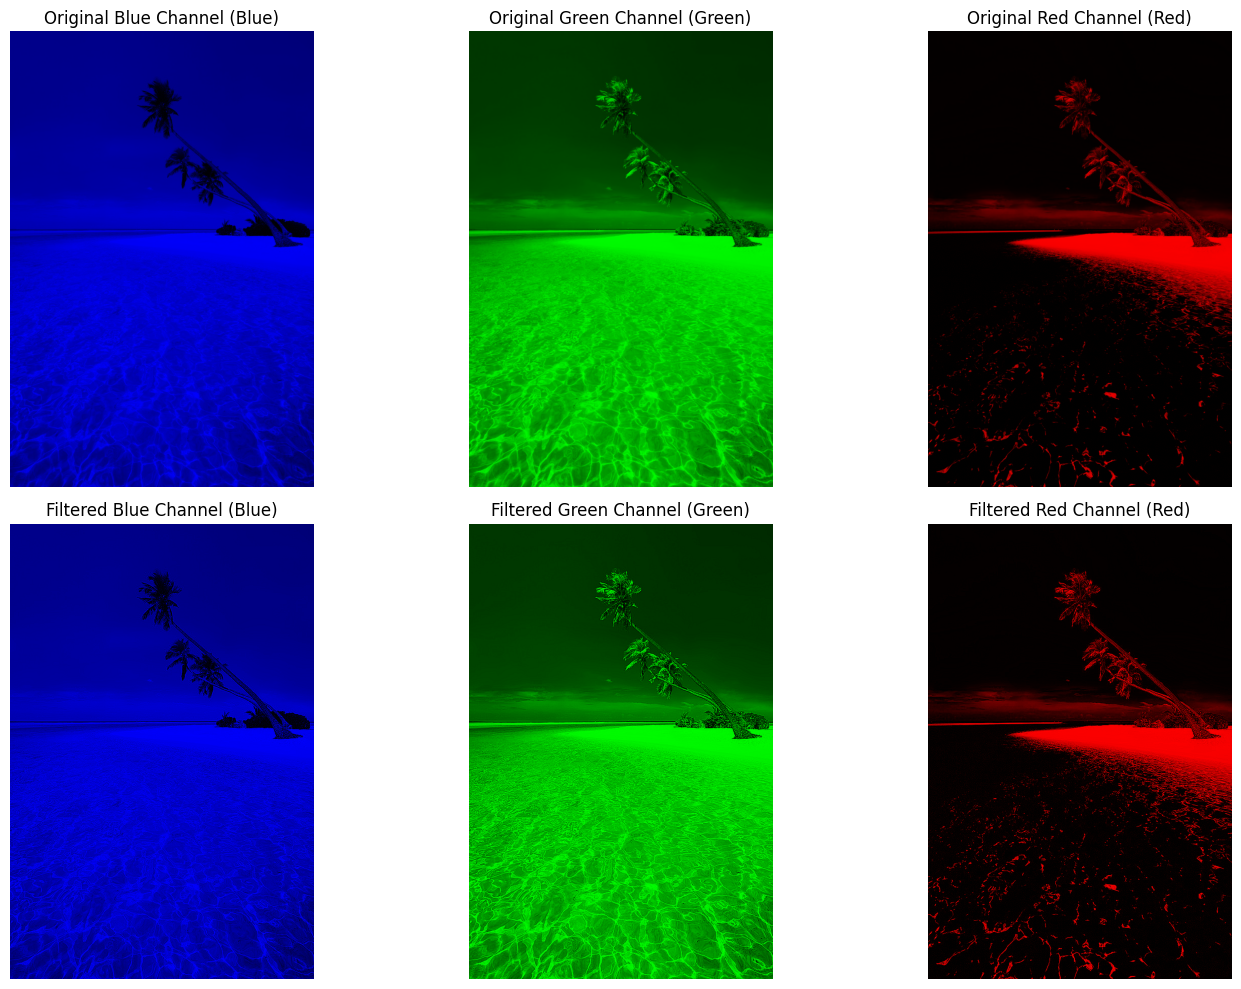

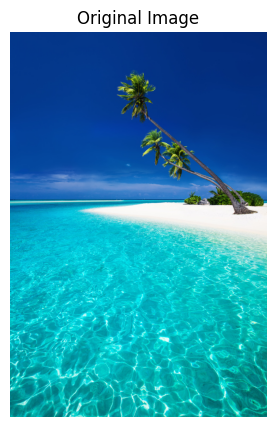

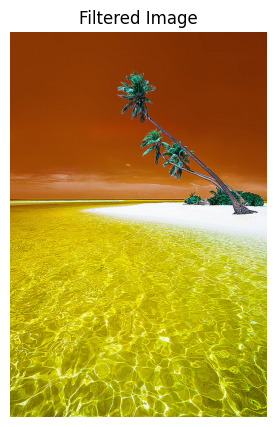

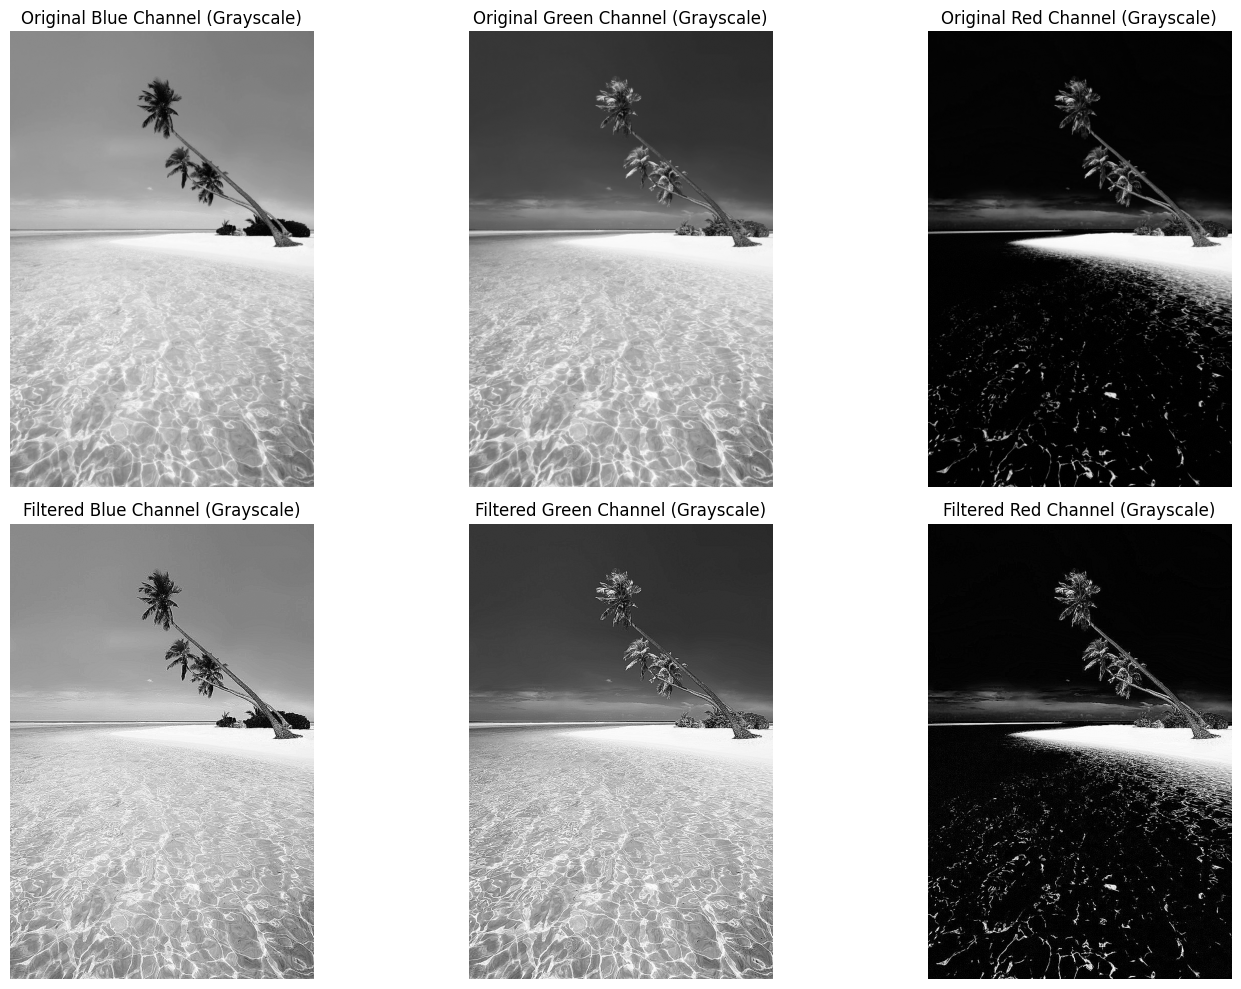

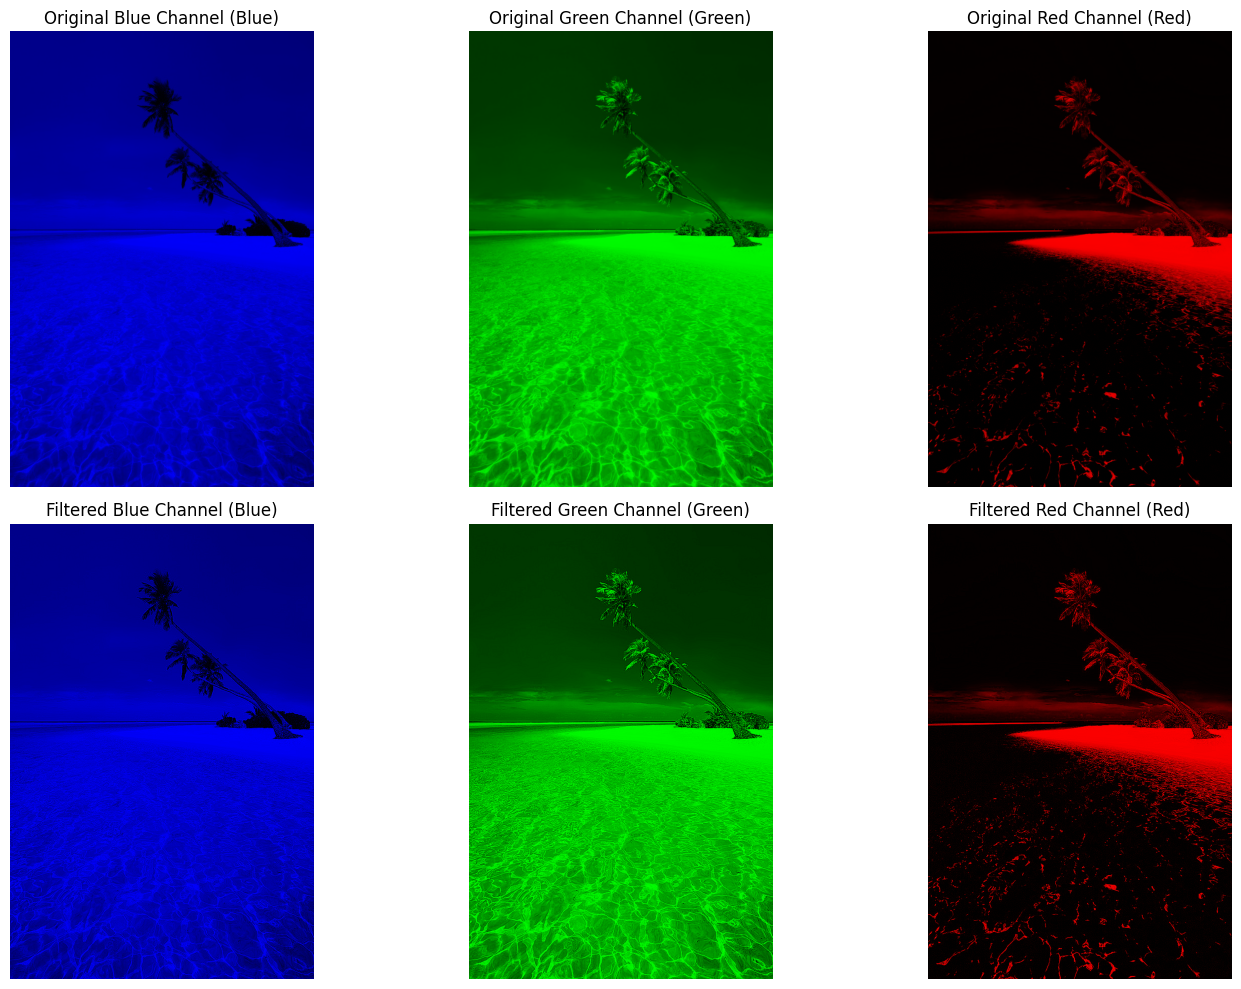

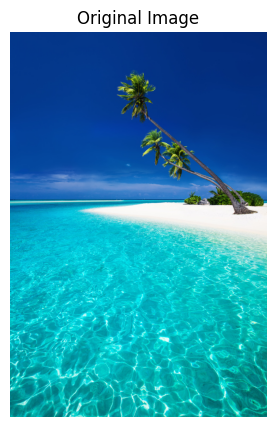

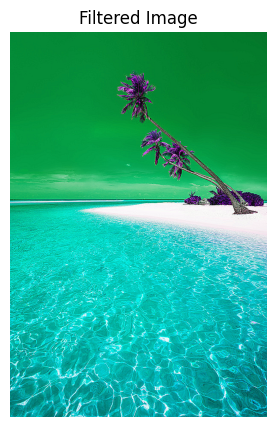

In [40]:
filtered_image_rgb = apply_filter(rgb_image, filter_kernel=kernel, arrange="RGB")
filtered_image_gbr = apply_filter(rgb_image, filter_kernel=kernel, arrange="GBR")

Text(0.5, 1.0, 'Filtered image gbr')

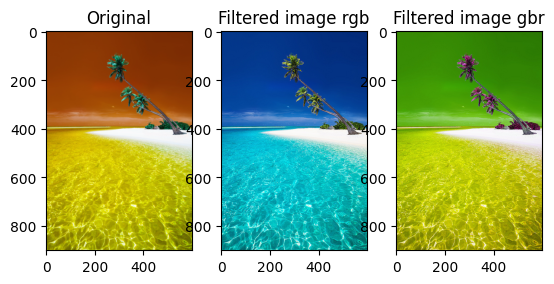

In [38]:
plt.subplot(1, 3, 1)
plt.imshow(rgb_image)
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(filtered_image_rgb)
plt.title("Filtered image rgb")

plt.subplot(1, 3, 3)
plt.imshow(filtered_image_gbr)
plt.title("Filtered image gbr")